In [1]:
# Github scraper

In [2]:
import requests

In [4]:
TOKEN = open('github_secret.txt').read().strip()

In [6]:
REPO = 'pytorch/pytorch'

In [7]:
# Headers for authentication
headers = {
    'Authorization': f'token {TOKEN}',
    'Accept': 'application/vnd.github.v3+json'
}

In [26]:
def get_issues(repo, state='all'):
    """
    Fetch all issues from the repository.
    :param repo: str, repository name in the format 'owner/repo'
    :param state: str, state of the issues to retrieve ('open', 'closed', 'all')
    :return: list, list of issues
    """
    issues = []
    page = 1
    for i in range(5000):
        print("iteration ", i)
        url = f'https://api.github.com/repos/{repo}/issues?state={state}&page={page}'
        response = requests.get(url, headers=headers)
        page_issues = response.json()
        if not page_issues:
            break
        issues.extend(page_issues)
        page += 1
    return issues

In [27]:
all_issues = get_issues(REPO)
# for issue in all_issues:
    # print(issue['title'], issue['html_url'])

iteration  0
iteration  1
iteration  2
iteration  3
iteration  4
iteration  5
iteration  6
iteration  7
iteration  8
iteration  9
iteration  10
iteration  11
iteration  12
iteration  13
iteration  14
iteration  15
iteration  16
iteration  17
iteration  18
iteration  19
iteration  20
iteration  21
iteration  22
iteration  23
iteration  24
iteration  25
iteration  26
iteration  27
iteration  28
iteration  29
iteration  30
iteration  31
iteration  32
iteration  33
iteration  34
iteration  35
iteration  36
iteration  37
iteration  38
iteration  39
iteration  40
iteration  41
iteration  42
iteration  43
iteration  44
iteration  45
iteration  46
iteration  47
iteration  48
iteration  49
iteration  50
iteration  51
iteration  52
iteration  53
iteration  54
iteration  55
iteration  56
iteration  57
iteration  58
iteration  59
iteration  60
iteration  61
iteration  62
iteration  63
iteration  64
iteration  65
iteration  66
iteration  67
iteration  68
iteration  69
iteration  70
iteration  71
it

KeyboardInterrupt: 

In [12]:
all_issues[0]

{'url': 'https://api.github.com/repos/pytorch/pytorch/issues/125243',
 'repository_url': 'https://api.github.com/repos/pytorch/pytorch',
 'labels_url': 'https://api.github.com/repos/pytorch/pytorch/issues/125243/labels{/name}',
 'comments_url': 'https://api.github.com/repos/pytorch/pytorch/issues/125243/comments',
 'events_url': 'https://api.github.com/repos/pytorch/pytorch/issues/125243/events',
 'html_url': 'https://github.com/pytorch/pytorch/issues/125243',
 'id': 2271965587,
 'node_id': 'I_kwDOA-j9z86Ha3GT',
 'number': 125243,
 'title': 'omp.h not found on macOS during install from source at github repo',
 'user': {'login': 'mikekgfb',
  'id': 61328285,
  'node_id': 'MDQ6VXNlcjYxMzI4Mjg1',
  'avatar_url': 'https://avatars.githubusercontent.com/u/61328285?v=4',
  'gravatar_id': '',
  'url': 'https://api.github.com/users/mikekgfb',
  'html_url': 'https://github.com/mikekgfb',
  'followers_url': 'https://api.github.com/users/mikekgfb/followers',
  'following_url': 'https://api.github.

In [17]:
for key in all_issues[0].keys():
    print(key)

url
repository_url
labels_url
comments_url
events_url
html_url
id
node_id
number
title
user
labels
state
locked
assignee
assignees
milestone
comments
created_at
updated_at
closed_at
author_association
active_lock_reason
body
reactions
timeline_url
performed_via_github_app
state_reason


In [25]:
all_issues[3]['labels'] # how to get the label 

[{'id': 1300933336,
  'node_id': 'MDU6TGFiZWwxMzAwOTMzMzM2',
  'url': 'https://api.github.com/repos/pytorch/pytorch/labels/module:%20tests',
  'name': 'module: tests',
  'color': 'f7e101',
  'default': False,
  'description': 'Issues related to tests (not the torch.testing module)'},
 {'id': 1301397902,
  'node_id': 'MDU6TGFiZWwxMzAxMzk3OTAy',
  'url': 'https://api.github.com/repos/pytorch/pytorch/labels/module:%20flaky-tests',
  'name': 'module: flaky-tests',
  'color': 'f7e101',
  'default': False,
  'description': 'Problem is a flaky test in CI'},
 {'id': 1679533716,
  'node_id': 'MDU6TGFiZWwxNjc5NTMzNzE2',
  'url': 'https://api.github.com/repos/pytorch/pytorch/labels/skipped',
  'name': 'skipped',
  'color': 'bfdadc',
  'default': False,
  'description': 'Denotes a (flaky) test currently skipped in CI.'},
 {'id': 4291178647,
  'node_id': 'LA_kwDOA-j9z87_xjCX',
  'url': 'https://api.github.com/repos/pytorch/pytorch/labels/oncall:%20pt2',
  'name': 'oncall: pt2',
  'color': '6385A2',

In [28]:
import ray

/Users/finnroblin/miniconda3/envs/598mlsys/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-04-30 13:16:37,662	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [ ]:
# Initialize Ray
# ray.init()

# Define a Ray remote function to fetch issues for a single page
@ray.remote
def fetch_issues_page(repo, page, headers):
    url = f'https://api.github.com/repos/{repo}/issues?state=all&page={page}'
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.json()
    else:
        return []

def get_issues(repo, headers, number_of_pages=100):
    """
    Fetch all issues from the repository using Ray for parallel processing.
    :param repo: str, repository name in the format 'owner/repo'
    :param headers: dict, headers including authorization tokens
    :return: list, list of all issues
    """
    # Check how many issues are potentially available by looking at the first page
    initial_response = requests.get(f'https://api.github.com/repos/{repo}/issues?state=all&page=1', headers=headers)
    if initial_response.status_code != 200:
        return []

    # # Estimating the number of pages from the link header (optional, for better parallelism control)
    # if 'link' in initial_response.headers:
    #     links = initial_response.headers['link']
    #     last_page = int(links.split(',')[-1].split('&page=')[1].split('>')[0])
    # else:
    #     last_page = 1
    last_page = number_of_pages

    # last_page = 5000
    # Launch a Ray task for each page
    # future_issues = [fetch_issues_page.remote(repo, page, headers) for page in range(1, last_page + 1)]

    # # Gather results from all the Ray tasks
    # issues = []
    # for future in ray.get(future_issues):
    #     issues.extend(future)

    task_limit = 10000
    total_pages = number_of_pages
    issues = []

    # Process pages in batches
    for batch_start in range(1, total_pages + 1, task_limit):
        batch_end = min(batch_start + task_limit - 1, total_pages)
        future_issues = [fetch_issues_page.remote(repo, page, headers) for page in range(batch_start, batch_end + 1)]
        
        # Gather results from Ray tasks within the current batch
        batch_results = ray.get(future_issues)
        for result in batch_results:
            issues.extend(result)



    return issues


In [31]:
all_issues = get_issues(REPO, headers)

In [33]:
len(all_issues)

14490

In [34]:
all_issues[100]

{'url': 'https://api.github.com/repos/pytorch/pytorch/issues/125145',
 'repository_url': 'https://api.github.com/repos/pytorch/pytorch',
 'labels_url': 'https://api.github.com/repos/pytorch/pytorch/issues/125145/labels{/name}',
 'comments_url': 'https://api.github.com/repos/pytorch/pytorch/issues/125145/comments',
 'events_url': 'https://api.github.com/repos/pytorch/pytorch/issues/125145/events',
 'html_url': 'https://github.com/pytorch/pytorch/pull/125145',
 'id': 2268465270,
 'node_id': 'PR_kwDOA-j9z85t-4w2',
 'number': 125145,
 'title': 'Fix typo in `compile` docstring regarding default `cache_size_limit`',
 'user': {'login': 'Ghelfi',
  'id': 22276944,
  'node_id': 'MDQ6VXNlcjIyMjc2OTQ0',
  'avatar_url': 'https://avatars.githubusercontent.com/u/22276944?v=4',
  'gravatar_id': '',
  'url': 'https://api.github.com/users/Ghelfi',
  'html_url': 'https://github.com/Ghelfi',
  'followers_url': 'https://api.github.com/users/Ghelfi/followers',
  'following_url': 'https://api.github.com/use

In [125]:
def get_valid_silent_issues(issues):
    """
    Filter out issues that are not valid (e.g. pull requests, empty issues).
    :param issues: list, list of issues
    :return: list, list of valid issues
    """
    valid_issues_indices = []
    for (idx, issue) in enumerate(issues):
        labels = issue['labels']
        for label in labels:
            if 'silent' in label['name'] and issue['body']:
                valid_issues_indices.append(issue)
    return valid_issues_indices

In [40]:
silent_issues_indices = get_valid_issues(all_issues)

In [41]:
silent_issues_indices

[144,
 193,
 259,
 410,
 411,
 508,
 622,
 905,
 1033,
 1143,
 1523,
 2061,
 2088,
 2323,
 3005,
 3208,
 3222,
 3841,
 4013,
 4616,
 4833,
 6763,
 6816,
 6968,
 7118,
 7378,
 8011,
 8215,
 8370,
 8456,
 8624,
 8731,
 8894,
 9571,
 9617,
 9703,
 9734,
 10871,
 10989,
 10991,
 10992,
 10993,
 10994,
 10995,
 11200,
 11264,
 11633,
 12047,
 12068,
 12202,
 12206,
 12627,
 13018,
 13316,
 13321,
 13571,
 13721,
 13789,
 14016,
 14092,
 14351]

In [42]:
for i in silent_issues_indices:
    print(all_issues[i]['title'], all_issues[i]['html_url'])

Bug when indexing 2D tensors using an MPS device https://github.com/pytorch/pytorch/issues/125100
MPS backend thinks that small floats are less than zero https://github.com/pytorch/pytorch/issues/125051
[MPS] `torch.nextafter` incorrect handling of negative inputs https://github.com/pytorch/pytorch/issues/124985
nn.functional.ELU output differs on MPS vs CPU if input is noncontiguous https://github.com/pytorch/pytorch/issues/124834
MPS RNG state fails to progress immediately after fork_rng https://github.com/pytorch/pytorch/issues/124833
torch._dynamo.allow_in_graph seems to silently no-op on staticmethods https://github.com/pytorch/pytorch/issues/124735
Conv with permutation on MPS will lead to negative MSE loss https://github.com/pytorch/pytorch/issues/124621
Data corrupted when transferring over 4GiB to MPS https://github.com/pytorch/pytorch/issues/124335
MPS backend incorrect tensor slicing results  https://github.com/pytorch/pytorch/issues/124206
MPS:  IRFFT returns incorrect resu

Potential things to look for:
MPS => it's a hardware issue. A lot of the silent bugs seem to be based on low-level torch functionality breaking on certain hardware with edge cases. 

Either MPS in title 


Could also infer from additional tags a more targetted approach (understand exactly which module is causing the bug). 

This one is a CUDA error: https://github.com/pytorch/pytorch/issues/86465

In [45]:
import re

# List of all keywords and phrases, exact phrases are included as complete strings
keywords = [
    "Silent", "Latent", "\"No error message\"", "\"Failure without exception\"",
    "\"Quiet fail\"", "\"Non-crashing bug\"", "\"Delayed error\"",
    "\"Time-dependent bug\"", "\"Asymptomatic failure\"", "Intermittent", "Flaky",
    "Unresponsive", "Hangs", "\"Memory leak\"", "\"Resource exhaustion\"",
    "Timeout", "Deadlock", "Performance degradation", "\"Long running\"", "\"Infinite loop\""
]

# Pre-compile regex patterns for exact phrases (inside quotes) and broad matches (outside quotes)
patterns = []
for keyword in keywords:
    if keyword.startswith('"') and keyword.endswith('"'):
        # Remove the quotes for exact matching and escape special regex characters
        pattern = re.escape(keyword[1:-1])
    else:
        # For broad match, split the words and match any of them
        words = keyword.split()
        pattern = '|'.join(re.escape(word) for word in words)
    patterns.append(re.compile(pattern, re.IGNORECASE))

def check_issue(title, body):
    """
    Count the number of unique keyword matches in an issue's title or body.    
    Args:
    issue (dict): An issue dictionary with 'title' and 'body' keys.
    """


    matches = set()
    # Check each compiled pattern against title and body
    for pattern in patterns:
        if pattern.search(title):
            matches.add(pattern.pattern)
        if pattern.search(body):
            matches.add(pattern.pattern)

    return len(matches)

# Example usage
issue = {
    'title': 'Memory leak when using certain features',
    'body': 'There seems to be a non-crashing bug related to memory allocation.'
}

# Test the function
match_count = check_issue(issue['title'], issue['body'])
print(match_count)  # Outputs the number of unique keyword matches

2


In [50]:
check_issue(all_issues[100]['title'], all_issues[100]['body'])

0

In [53]:
for i in range(100):
    title = all_issues[i]['title']
    body = all_issues[i]['body']

    if ("DISABLED" not in title): # skip DISABLED CI/CD Tests Issues
        try:
            match_count = check_issue(all_issues[i]['title'], all_issues[i]['body'])
            if match_count > 0:
                print(all_issues[i]['title'], all_issues[i]['html_url'], match_count)
        except:
            print(i, all_issues[i]['title'], all_issues[i]['body'])

Improved strategy for dealing with deterministically flaky tests which are order sensitive https://github.com/pytorch/pytorch/issues/125239 1
[Inductor] [Distributed] DDP torch.compile model hangs on exit (python 3.8/3.9) https://github.com/pytorch/pytorch/issues/125235 1
MaxPool2D memory leakage on device MPS https://github.com/pytorch/pytorch/issues/125217 1
56 [ignore this] Testing None
Flight Recorder Sequence IDs are insufficient https://github.com/pytorch/pytorch/issues/125173 1
[dtensor] use str for reduce_op https://github.com/pytorch/pytorch/pull/125172 1
save the reciprocal of weights for welford_reduce https://github.com/pytorch/pytorch/pull/125148 1


In [63]:
# scuffed hardcoding
number_deepspeed_pages = 912 + 1604
number_tensorflow_pages = 1923 + 37223
number_pytorch_pages = 13094 + 28469

In [65]:
# do this for tensorflow, deepspeed issues

all_deepspeed_issues = get_issues('microsoft/deepspeed', headers, number_deepspeed_pages)
all_pytorch_issues = get_issues('pytorch/pytorch', headers, number_pytorch_pages)
all_tensorflow_issues = get_issues('tensorflow/tensorflow', headers, number_tensorflow_pages)

In [67]:
all_pytorch_issues = get_issues('pytorch/pytorch', headers, number_pytorch_pages)


In [66]:
len(all_deepspeed_issues), len(all_pytorch_issues), len(all_tensorflow_issues)

(5218, 0, 0)

In [68]:
len(all_pytorch_issues)

13740

In [69]:
all_tensorflow_issues = get_issues('tensorflow/tensorflow', headers, number_tensorflow_pages)

In [74]:
len(all_tensorflow_issues)

9660

In [101]:
def get_silent_issues_via_NLP(issue_set):
    results = []
    for issue in issue_set:
        title = issue['title']
        body = issue['body']

        if ("DISABLED" not in title): # skip DISABLED CI/CD Tests Issues
            try:
                match_count = check_issue(title, body)
                if match_count > 1:
                    results.append(issue)
                    print(title, issue['html_url'], match_count)
            except:
                print("exception on title: ",title)

    return results

In [102]:
silent_tensorflow_issues = get_silent_issues_via_NLP(all_tensorflow_issues)

exception on title:  [ROCm] Add OUTPUT_PATH repo env to set destination for artifacts
exception on title:  iwyu: missing includes in xla
exception on title:  [
Memory leak in tf.data when iterating over Dataset.from_generator https://github.com/tensorflow/tensorflow/issues/65675 2
IntegerLookup layer performance issue when inited with vocabulary https://github.com/tensorflow/tensorflow/issues/65610 2
exception on title:  I am encountering an error: Error with  computation = RQAComputation.create(settings, verbose=True) when I use HPC. However, I do not encounter any error when I use my personal laptop for the same code and installing the same package : from pyrqa.computation import RQAComputation
exception on title:  Remove missing `cuda.h` header from `mat_mul_op.cc`
exception on title:  Linking hell
exception on title:  testing bazel PR deps
exception on title:  Add tf.keras.metrics.Variance
exception on title:  Update RELEASE.md
exception on title:  [ARM_CI:Linaro] Add Python 3.12 t

In [103]:
len(silent_tensorflow_issues)

63

In [104]:
silent_deepspeed_issues = get_silent_issues_via_NLP(all_deepspeed_issues)

exception on title:  Update with ops not supported on Windows
exception on title:  Disable unsupported ops on Windows from Windows build script.
exception on title:  [REQUEST] i want to know how to merge  deepspeed multi gpu optim file into one pytorch optim.pt file ?  
exception on title:  Update PyTest torch version to match PyTorch latest official (2.3.0)
exception on title:  Add positional args in engine.py
[BUG] DeepSpeed hangs during evaluation under multi-GPU https://github.com/microsoft/DeepSpeed/issues/5394 2
exception on title:  Add CI for Intel XPU/Max1100
exception on title:  Skip the UT cases that use unimplemented op builders.
exception on title:  Switch to shared function to check torch version
exception on title:  force casting to bf16 on forward
exception on title:  Update to use ROCm 5.7
exception on title:  Increase coverage for HPU
exception on title:  Add intel gaudi to contributed HW in README
exception on title:  Supporting custom backend for all accelerator.
exc

In [105]:
len(silent_deepspeed_issues)

18

In [135]:
deepspeed_percentage_silent = len(silent_deepspeed_issues) / len(all_deepspeed_issues) * 100
tensorflow_percentage_silent = len(silent_tensorflow_issues) / len(all_tensorflow_issues) * 100


In [126]:
pytorch_silent_issues = get_valid_silent_issues(all_pytorch_issues)

In [87]:
len(pytorch_silent_issues)

43

In [134]:
pytorch_percentage_silent = len(pytorch_silent_issues) / len(all_pytorch_issues) * 100

In [107]:
print(f"Deepspeed Silent Issue Percentage: {deepspeed_percentage_silent:.2f}%, Tensorflow Silent Issue Percentage: {tensorflow_percentage_silent:.2f}%, Pytorch Silent Issue Percentage: {pytorch_percentage_silent:.2f}%")

Deepspeed Silent Issue Percentage: 0.34%, Tensorflow Silent Issue Percentage: 0.65%, Pytorch Silent Issue Percentage: 0.31%


In [119]:
# next, remove hardware specific issues. 

def remove_hardware_issues(issue_set):
    result = []
    for issue in issue_set:
        if not ("MLP" in issue['title'] or "CUDA" in issue['title']):
            result.append(issue)
    return result

In [127]:
after_hardware_removal_tensorflow = remove_hardware_issues(silent_tensorflow_issues)
after_hardware_removal_deepspeed = remove_hardware_issues(silent_deepspeed_issues)
after_hardware_removal_pytorch = remove_hardware_issues(pytorch_silent_issues)

In [128]:
len(after_hardware_removal_tensorflow), len(after_hardware_removal_deepspeed), len(after_hardware_removal_pytorch)

(62, 16, 43)

In [133]:
# generate percentages after hardware removals

deepspeed_percentage_silent_no_hw = len(after_hardware_removal_deepspeed) / len(all_deepspeed_issues) * 100
tensorflow_percentage_silent_no_hw = len(after_hardware_removal_tensorflow) / len(all_tensorflow_issues) * 100
pytorch_percentage_silent_no_hw = len(after_hardware_removal_pytorch) / len(all_pytorch_issues) * 100

In [132]:
print(f"Deepspeed Silent Issue Percentage: {deepspeed_percentage_silent:.2f}%, Tensorflow Silent Issue Percentage: {tensorflow_percentage_silent:.2f}%, Pytorch Silent Issue Percentage: {pytorch_percentage_silent:.2f}%")

Deepspeed Silent Issue Percentage: 0.31%, Tensorflow Silent Issue Percentage: 0.64%, Pytorch Silent Issue Percentage: 0.31%


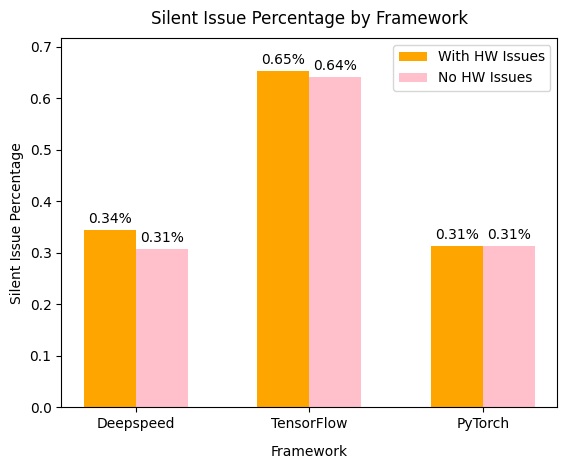

In [154]:
import matplotlib.pyplot as plt

# Sample data, these should be replaced by your actual variables
# Silent issue percentages with hardware
# deepspeed_percentage_silent = 10
# tensorflow_percentage_silent = 20
# pytorch_percentage_silent = 30

# # Silent issue percentages after hardware removal
# deepspeed_percentage_silent_no_hw = 5
# tensorflow_percentage_silent_no_hw = 15
# pytorch_percentage_silent_no_hw = 25

# Labels for the groups
group_labels = ['Deepspeed', 'TensorFlow', 'PyTorch']

# Values
values_with_hw = [deepspeed_percentage_silent, tensorflow_percentage_silent, pytorch_percentage_silent]
values_without_hw = [deepspeed_percentage_silent_no_hw, tensorflow_percentage_silent_no_hw, pytorch_percentage_silent_no_hw]

# Creating the bar chart
x = range(len(group_labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, values_with_hw, width, label='With HW Issues', color='orange')
rects2 = ax.bar([p + width for p in x], values_without_hw, width, label='No HW Issues', color='pink')
ax.set_ylim(0, max(values_with_hw + values_without_hw) * 1.1)  # Extending the y-axis to 120% of the highest bar
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Framework', labelpad=10)
ax.set_ylabel('Silent Issue Percentage')
ax.set_title('Silent Issue Percentage by Framework', pad=10)
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(group_labels)
ax.legend()

# Adding labels above the bars for clarity
def autolabel(rects):
    """Attach a text label above each bar displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()